7 soccer.mp4_00-10.000_00-19.933_C_A.png {'C': 'Blue', 'A': 'Pumpkin'}
9 soccer.mp4_00-10.133_00-19.933_D_C.png {'D': 'Blue', 'C': 'Pumpkin'}
19 soccer.mp4_00-24.399_00-29.333_F_E.png {'F': 'Blue', 'E': 'Pumpkin'}
24 soccer.mp4_00-40.000_00-48.200_D_A.png {'D': 'Blue', 'A': 'Pumpkin'}
29 soccer.mp4_00-50.000_01-00.000_B_A.png {'B': 'Blue', 'A': 'Pumpkin'}
30 soccer.mp4_00-50.000_01-00.000_C_A.png {'C': 'Blue', 'A': 'Pumpkin'}


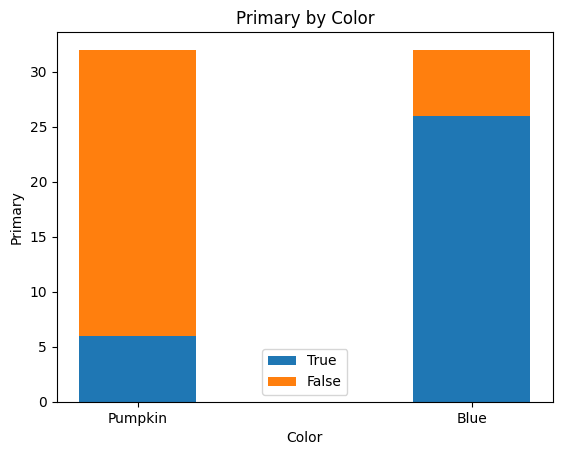

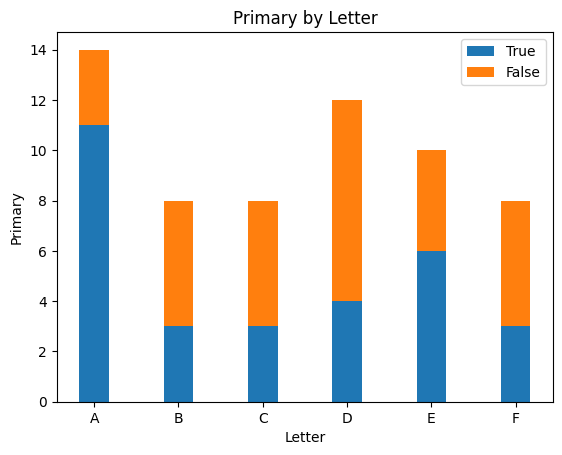

In [1]:
import os
from pathlib import Path
import json

path = "/home/luis/workspace/vacocam_render/experiments/vacocam/vaco_colors/v1"
path = Path(path)

pngs = [f for f in os.listdir(path / "presentation") if f.endswith(".png")]
pngs = sorted(pngs)

DATA = []

for png in pngs:
    json_name = png.replace(".png", ".json")
    txt_name = png.replace(".png", ".txt")

    json_path = path / "gpt4" / json_name
    txt_path = path / "presentation" / txt_name

    if os.path.isfile(json_path) and os.path.isfile(txt_path):
        results = {}
        with open(json_path, "r") as f:
            data = f.read()

            data = json.loads(data)
            content = data["choices"][0]["message"]["content"]
            content = json.loads(content)

            for result in content:
                id = result["id"]
                primary = result["primary"]
                results[id] = primary

        colors = {}
        with open(txt_path, "r") as f:
            lines = f.readlines()

            for line in lines[1:]:
                parts = line.split(",")
                colors[parts[0]] = parts[1].strip()

        result = {
            "name": png,
            "colors": colors,
            "results": results,
        }

        DATA.append(result)

# plot a bar chart comparing if primary and their colors
import matplotlib.pyplot as plt

# first, flatten the results
flattened = []
for idx, item in enumerate(DATA):
    colors = item["colors"]
    results = item["results"]

    # find the id where the primary is True
    true_ids = [id for id, primary in results.items() if primary == True]
    id = true_ids[0]

    if colors[id] == "Pumpkin":
        print(idx, item["name"], colors)

    for id, primary in results.items():
        flattened.append({
            "id": id,
            "primary": primary,
            "color": colors[id],
        })

# now plot the bar chart
# the colors are Pumpkin, Blue
# the primary are True or False

# count the number of times a color is primary
pumpkin = 0
blue = 0
for item in flattened:
    if item["color"] == "Pumpkin":
        pumpkin += 1
    elif item["color"] == "Blue":
        blue += 1

# count the number of times a color is primary
pumpkin_true = 0
pumpkin_false = 0
blue_true = 0
blue_false = 0

for item in flattened:
    if item["color"] == "Pumpkin":
        if item["primary"] == True:
            pumpkin_true += 1
        else:
            pumpkin_false += 1
    elif item["color"] == "Blue":
        if item["primary"] == True:
            blue_true += 1
        else:
            blue_false += 1

# plot the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = [0, 1]

rects1 = ax.bar(index, [pumpkin_true, blue_true], bar_width, label="True")
rects2 = ax.bar(index, [pumpkin_false, blue_false], bar_width, label="False", bottom=[pumpkin_true, blue_true])

ax.set_xlabel("Color")
ax.set_ylabel("Primary")
ax.set_title("Primary by Color")
ax.set_xticks(index)
ax.set_xticklabels(["Pumpkin", "Blue"])
ax.legend()

plt.show()

# now do the exact same but for the label letter

# first, flatten the results
flattened = []

for idx, item in enumerate(DATA):
    colors = item["colors"]
    results = item["results"]

    # find the id where the primary is True
    true_ids = [id for id, primary in results.items() if primary == True]
    id = true_ids[0]

    for id, primary in results.items():
        flattened.append({
            "id": id,
            "primary": primary,
            "color": colors[id],
        })

# now plot the bar chart
# the letters are A, B, C, D, E, F

# count the number of times a letter is primary
letters = {}
for item in flattened:
    letter = item["id"]
    if letter in letters:
        letters[letter] += 1
    else:
        letters[letter] = 1

# count the number of times a letter is primary
letters_true = {}
letters_false = {}

for item in flattened:
    letter = item["id"]
    if letter in letters_true:
        if item["primary"] == True:
            letters_true[letter] += 1
        else:
            letters_false[letter] += 1
    else:
        if item["primary"] == True:
            letters_true[letter] = 1
            letters_false[letter] = 0
        else:
            letters_true[letter] = 0
            letters_false[letter] = 1

# plot the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = range(6)

rects1 = ax.bar(index, [letters_true["A"], letters_true["B"], letters_true["C"], letters_true["D"], letters_true["E"], letters_true["F"]], bar_width, label="True")
rects2 = ax.bar(index, [letters_false["A"], letters_false["B"], letters_false["C"], letters_false["D"], letters_false["E"], letters_false["F"]], bar_width, label="False", bottom=[letters_true["A"], letters_true["B"], letters_true["C"], letters_true["D"], letters_true["E"], letters_true["F"]])

ax.set_xlabel("Letter")
ax.set_ylabel("Primary")
ax.set_title("Primary by Letter")
ax.set_xticks(index)
ax.set_xticklabels(["A", "B", "C", "D", "E", "F"])
ax.legend()

plt.show()



8 soccer.mp4_00-10.133_00-19.933_C_D.png {'C': 'Pumpkin', 'D': 'Violet'}
18 soccer.mp4_00-24.399_00-29.333_E_F.png {'E': 'Pumpkin', 'F': 'Red'}
25 soccer.mp4_00-40.000_00-48.200_E_A.png {'E': 'Chartreuse', 'A': 'Pumpkin'}


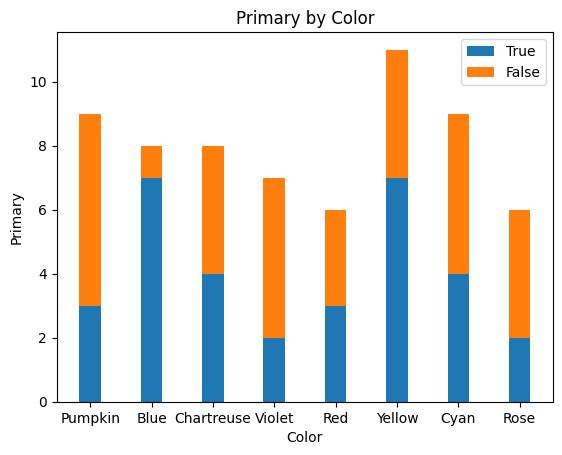

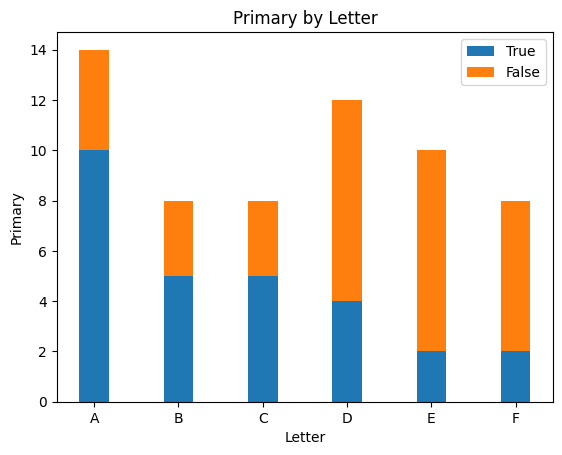

In [6]:
import os
from pathlib import Path
import json

path = "/home/luis/workspace/vacocam_render/experiments/vacocam/vaco_colors/v2"
path = Path(path)

pngs = [f for f in os.listdir(path / "presentation") if f.endswith(".png")]
pngs = sorted(pngs)

DATA = []

for png in pngs:
    json_name = png.replace(".png", ".json")
    txt_name = png.replace(".png", ".txt")

    json_path = path / "gpt4" / json_name
    txt_path = path / "presentation" / txt_name

    if os.path.isfile(json_path) and os.path.isfile(txt_path):
        results = {}
        with open(json_path, "r") as f:
            data = f.read()

            data = json.loads(data)
            content = data["choices"][0]["message"]["content"]
            content = json.loads(content)

            for result in content:
                id = result["id"]
                primary = result["primary"]
                results[id] = primary

        colors = {}
        with open(txt_path, "r") as f:
            lines = f.readlines()

            for line in lines[1:]:
                parts = line.split(",")
                colors[parts[0]] = parts[1].strip()

        result = {
            "name": png,
            "colors": colors,
            "results": results,
        }

        DATA.append(result)

# plot a bar chart comparing if primary and their colors
import matplotlib.pyplot as plt

# first, flatten the results
flattened = []
for idx, item in enumerate(DATA):
    colors = item["colors"]
    results = item["results"]

    # find the id where the primary is True
    true_ids = [id for id, primary in results.items() if primary == True]
    id = true_ids[0]

    if colors[id] == "Pumpkin":
        print(idx, item["name"], colors)

    for id, primary in results.items():
        flattened.append({
            "id": id,
            "primary": primary,
            "color": colors[id],
        })

# now plot the bar chart
# the colors are Pumpkin, Blue, Chartreuse, Violet, Red, Yellow, Cyan, Rose
# the primary are True or False
colors = ["Pumpkin", "Blue", "Chartreuse", "Violet", "Red", "Yellow", "Cyan", "Rose"]

# count the number of times a color is primary
colors_true = {}
colors_false = {}

for item in flattened:
    if item["color"] in colors_true:
        if item["primary"] == True:
            colors_true[item["color"]] += 1
        else:
            colors_false[item["color"]] += 1
    else:
        if item["primary"] == True:
            colors_true[item["color"]] = 1
            colors_false[item["color"]] = 0
        else:
            colors_true[item["color"]] = 0
            colors_false[item["color"]] = 1

# plot the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(colors))

rects1 = ax.bar(index, [colors_true[color] for color in colors], bar_width, label="True")
rects2 = ax.bar(index, [colors_false[color] for color in colors], bar_width, label="False", bottom=[colors_true[color] for color in colors])

ax.set_xlabel("Color")
ax.set_ylabel("Primary")
ax.set_title("Primary by Color")
ax.set_xticks(index)
ax.set_xticklabels(colors)
ax.legend()

plt.show()

# now do the exact same but for the label letter

# first, flatten the results
flattened = []

for idx, item in enumerate(DATA):
    colors = item["colors"]
    results = item["results"]

    # find the id where the primary is True
    true_ids = [id for id, primary in results.items() if primary == True]
    id = true_ids[0]

    for id, primary in results.items():
        flattened.append({
            "id": id,
            "primary": primary,
            "color": colors[id],
        })

# now plot the bar chart
# the letters are A, B, C, D, E, F

# count the number of times a letter is primary
letters = {}
for item in flattened:
    letter = item["id"]
    if letter in letters:
        letters[letter] += 1
    else:
        letters[letter] = 1

# count the number of times a letter is primary
letters_true = {}
letters_false = {}

for item in flattened:
    letter = item["id"]
    if letter in letters_true:
        if item["primary"] == True:
            letters_true[letter] += 1
        else:
            letters_false[letter] += 1
    else:
        if item["primary"] == True:
            letters_true[letter] = 1
            letters_false[letter] = 0
        else:
            letters_true[letter] = 0
            letters_false[letter] = 1

# plot the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = range(6)

rects1 = ax.bar(index, [letters_true["A"], letters_true["B"], letters_true["C"], letters_true["D"], letters_true["E"], letters_true["F"]], bar_width, label="True")
rects2 = ax.bar(index, [letters_false["A"], letters_false["B"], letters_false["C"], letters_false["D"], letters_false["E"], letters_false["F"]], bar_width, label="False", bottom=[letters_true["A"], letters_true["B"], letters_true["C"], letters_true["D"], letters_true["E"], letters_true["F"]])

ax.set_xlabel("Letter")
ax.set_ylabel("Primary")
ax.set_title("Primary by Letter")
ax.set_xticks(index)
ax.set_xticklabels(["A", "B", "C", "D", "E", "F"])
ax.legend()

plt.show()

1 soccer.mp4_00-00.000_00-10.000_B_A.png {'B': 'Rose', 'A': 'Pumpkin'}
5 soccer.mp4_00-00.000_00-10.000_F_B.png {'F': 'Pumpkin', 'B': 'Rose'}
14 soccer.mp4_00-21.766_00-29.833_D_G.png {'D': 'Cyan', 'G': 'Pumpkin'}
16 soccer.mp4_00-21.766_00-29.833_F_D.png {'F': 'Pumpkin', 'D': 'Rose'}
19 soccer.mp4_00-24.399_00-29.333_F_E.png {'F': 'Red', 'E': 'Pumpkin'}
26 soccer.mp4_00-50.000_01-00.000_A_B.png {'A': 'Pumpkin', 'B': 'Rose'}


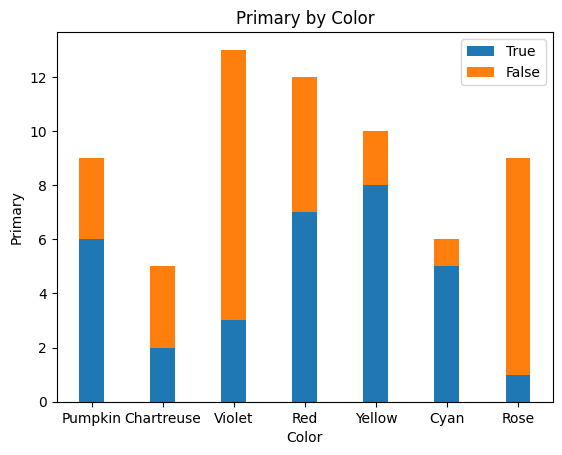

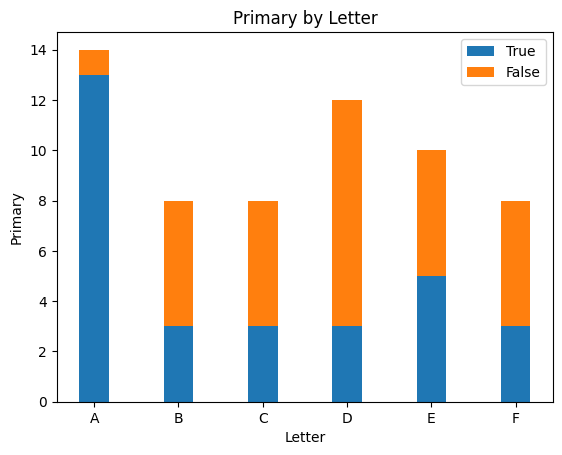

In [5]:
import os
from pathlib import Path
import json

path = "/home/luis/workspace/vacocam_render/experiments/vacocam/vaco_colors/v3"
path = Path(path)

pngs = [f for f in os.listdir(path / "presentation") if f.endswith(".png")]
pngs = sorted(pngs)

DATA = []

for png in pngs:
    json_name = png.replace(".png", ".json")
    txt_name = png.replace(".png", ".txt")

    json_path = path / "gpt4" / json_name
    txt_path = path / "presentation" / txt_name

    if os.path.isfile(json_path) and os.path.isfile(txt_path):
        results = {}
        with open(json_path, "r") as f:
            data = f.read()

            data = json.loads(data)
            content = data["choices"][0]["message"]["content"]
            content = json.loads(content)

            for result in content:
                id = result["id"]
                primary = result["primary"]
                results[id] = primary

        colors = {}
        with open(txt_path, "r") as f:
            lines = f.readlines()

            for line in lines[1:]:
                parts = line.split(",")
                colors[parts[0]] = parts[1].strip()

        result = {
            "name": png,
            "colors": colors,
            "results": results,
        }

        DATA.append(result)

# plot a bar chart comparing if primary and their colors
import matplotlib.pyplot as plt

# first, flatten the results
flattened = []
for idx, item in enumerate(DATA):
    colors = item["colors"]
    results = item["results"]

    # find the id where the primary is True
    true_ids = [id for id, primary in results.items() if primary == True]
    id = true_ids[0]

    if colors[id] == "Pumpkin":
        print(idx, item["name"], colors)

    for id, primary in results.items():
        flattened.append({
            "id": id,
            "primary": primary,
            "color": colors[id],
        })

# now plot the bar chart
# the colors are Pumpkin, Chartreuse, Violet, Red, Yellow, Cyan, Rose
# the primary are True or False
colors = ["Pumpkin", "Chartreuse", "Violet", "Red", "Yellow", "Cyan", "Rose"]

# count the number of times a color is primary
colors_true = {}
colors_false = {}

for item in flattened:
    if item["color"] in colors_true:
        if item["primary"] == True:
            colors_true[item["color"]] += 1
        else:
            colors_false[item["color"]] += 1
    else:
        if item["primary"] == True:
            colors_true[item["color"]] = 1
            colors_false[item["color"]] = 0
        else:
            colors_true[item["color"]] = 0
            colors_false[item["color"]] = 1

# plot the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(colors))

rects1 = ax.bar(index, [colors_true[color] for color in colors], bar_width, label="True")
rects2 = ax.bar(index, [colors_false[color] for color in colors], bar_width, label="False", bottom=[colors_true[color] for color in colors])

ax.set_xlabel("Color")
ax.set_ylabel("Primary")
ax.set_title("Primary by Color")
ax.set_xticks(index)
ax.set_xticklabels(colors)
ax.legend()

plt.show()

# now do the exact same but for the label letter

# first, flatten the results
flattened = []

for idx, item in enumerate(DATA):
    colors = item["colors"]
    results = item["results"]

    # find the id where the primary is True
    true_ids = [id for id, primary in results.items() if primary == True]
    id = true_ids[0]

    for id, primary in results.items():
        flattened.append({
            "id": id,
            "primary": primary,
            "color": colors[id],
        })

# now plot the bar chart
# the letters are A, B, C, D, E, F

# count the number of times a letter is primary
letters = {}
for item in flattened:
    letter = item["id"]
    if letter in letters:
        letters[letter] += 1
    else:
        letters[letter] = 1

# count the number of times a letter is primary
letters_true = {}
letters_false = {}

for item in flattened:
    letter = item["id"]
    if letter in letters_true:
        if item["primary"] == True:
            letters_true[letter] += 1
        else:
            letters_false[letter] += 1
    else:
        if item["primary"] == True:
            letters_true[letter] = 1
            letters_false[letter] = 0
        else:
            letters_true[letter] = 0
            letters_false[letter] = 1

# plot the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = range(6)

rects1 = ax.bar(index, [letters_true["A"], letters_true["B"], letters_true["C"], letters_true["D"], letters_true["E"], letters_true["F"]], bar_width, label="True")
rects2 = ax.bar(index, [letters_false["A"], letters_false["B"], letters_false["C"], letters_false["D"], letters_false["E"], letters_false["F"]], bar_width, label="False", bottom=[letters_true["A"], letters_true["B"], letters_true["C"], letters_true["D"], letters_true["E"], letters_true["F"]])

ax.set_xlabel("Letter")
ax.set_ylabel("Primary")
ax.set_title("Primary by Letter")
ax.set_xticks(index)
ax.set_xticklabels(["A", "B", "C", "D", "E", "F"])
ax.legend()

plt.show()

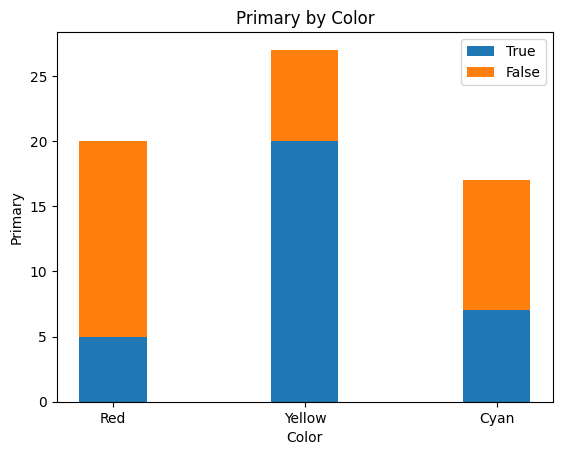

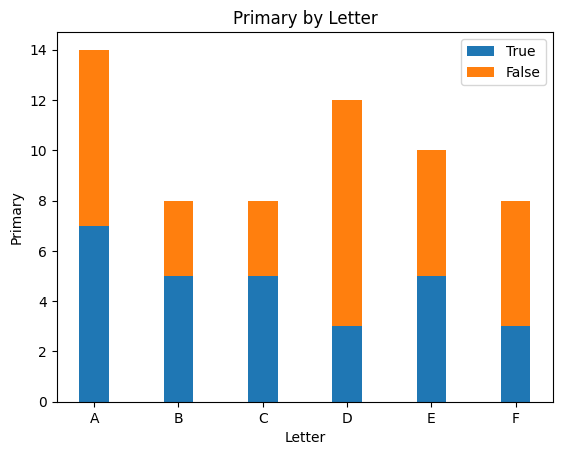

In [8]:
import os
from pathlib import Path
import json

path = "/home/luis/workspace/vacocam_render/experiments/vacocam/vaco_colors/v4"
path = Path(path)

pngs = [f for f in os.listdir(path / "presentation") if f.endswith(".png")]
pngs = sorted(pngs)

DATA = []

for png in pngs:
    json_name = png.replace(".png", ".json")
    txt_name = png.replace(".png", ".txt")

    json_path = path / "gpt4" / json_name
    txt_path = path / "presentation" / txt_name

    if os.path.isfile(json_path) and os.path.isfile(txt_path):
        results = {}
        with open(json_path, "r") as f:
            data = f.read()

            data = json.loads(data)
            content = data["choices"][0]["message"]["content"]
            content = json.loads(content)

            for result in content:
                id = result["id"]
                primary = result["primary"]
                results[id] = primary

        colors = {}
        with open(txt_path, "r") as f:
            lines = f.readlines()

            for line in lines[1:]:
                parts = line.split(",")
                colors[parts[0]] = parts[1].strip()

        result = {
            "name": png,
            "colors": colors,
            "results": results,
        }

        DATA.append(result)

# plot a bar chart comparing if primary and their colors
import matplotlib.pyplot as plt

# first, flatten the results
flattened = []
for idx, item in enumerate(DATA):
    colors = item["colors"]
    results = item["results"]

    # find the id where the primary is True
    true_ids = [id for id, primary in results.items() if primary == True]
    id = true_ids[0]

    if colors[id] == "Pumpkin":
        print(idx, item["name"], colors)

    for id, primary in results.items():
        flattened.append({
            "id": id,
            "primary": primary,
            "color": colors[id],
        })

colors = ["Red", "Yellow", "Cyan"]

# count the number of times a color is primary
colors_true = {}
colors_false = {}

for item in flattened:
    if item["color"] in colors_true:
        if item["primary"] == True:
            colors_true[item["color"]] += 1
        else:
            colors_false[item["color"]] += 1
    else:
        if item["primary"] == True:
            colors_true[item["color"]] = 1
            colors_false[item["color"]] = 0
        else:
            colors_true[item["color"]] = 0
            colors_false[item["color"]] = 1

# plot the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(colors))

rects1 = ax.bar(index, [colors_true[color] for color in colors], bar_width, label="True")
rects2 = ax.bar(index, [colors_false[color] for color in colors], bar_width, label="False", bottom=[colors_true[color] for color in colors])

ax.set_xlabel("Color")
ax.set_ylabel("Primary")
ax.set_title("Primary by Color")
ax.set_xticks(index)
ax.set_xticklabels(colors)
ax.legend()

plt.show()

# now do the exact same but for the label letter

# first, flatten the results
flattened = []

for idx, item in enumerate(DATA):
    colors = item["colors"]
    results = item["results"]

    # find the id where the primary is True
    true_ids = [id for id, primary in results.items() if primary == True]
    id = true_ids[0]

    for id, primary in results.items():
        flattened.append({
            "id": id,
            "primary": primary,
            "color": colors[id],
        })

# now plot the bar chart
# the letters are A, B, C, D, E, F

# count the number of times a letter is primary
letters = {}
for item in flattened:
    letter = item["id"]
    if letter in letters:
        letters[letter] += 1
    else:
        letters[letter] = 1

# count the number of times a letter is primary
letters_true = {}
letters_false = {}

for item in flattened:
    letter = item["id"]
    if letter in letters_true:
        if item["primary"] == True:
            letters_true[letter] += 1
        else:
            letters_false[letter] += 1
    else:
        if item["primary"] == True:
            letters_true[letter] = 1
            letters_false[letter] = 0
        else:
            letters_true[letter] = 0
            letters_false[letter] = 1

# plot the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = range(6)

rects1 = ax.bar(index, [letters_true["A"], letters_true["B"], letters_true["C"], letters_true["D"], letters_true["E"], letters_true["F"]], bar_width, label="True")
rects2 = ax.bar(index, [letters_false["A"], letters_false["B"], letters_false["C"], letters_false["D"], letters_false["E"], letters_false["F"]], bar_width, label="False", bottom=[letters_true["A"], letters_true["B"], letters_true["C"], letters_true["D"], letters_true["E"], letters_true["F"]])

ax.set_xlabel("Letter")
ax.set_ylabel("Primary")
ax.set_title("Primary by Letter")
ax.set_xticks(index)
ax.set_xticklabels(["A", "B", "C", "D", "E", "F"])
ax.legend()

plt.show()